# Using module to load preprocessed data

- Using AirQuality_Preprocessing.py

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt #visualization
import pandas as pd
import scipy.stats as stats #statistical analysis
import seaborn as sns #visualization

In [2]:
#importing module that wraps preprocessing steps
import AirQuality_Preprocessing as ap

In [ ]:
#reimport if necessary (edit file after already imported)
import importlib
importlib.reload(ap)

In [4]:
#loading the dataset/applying preprocessing
df=ap.load_preprocess_data('Air_Quality.csv')

In [5]:
#checking that everything loaded correctly
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Season
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,Summer
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,Summer
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,Summer
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,Summer
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,Winter


## Data splicing

Pulling out datasets for contaminants of interest for seasonal question:

- 'Ozone (O3)'
- 'Fine Particulate Matter (PM2.5)'
- 'Sulfur Dioxide (SO2)'

In [6]:
#'Ozone (O3)'
ozone_winter=df.loc[(df['Season']=='Winter') & (df['Name']=='Ozone (O3)')]
ozone_summer=df.loc[(df['Season']=='Summer') & (df['Name']=='Ozone (O3)')]

#checking how much data is available after splicing
print(f'Number of winter Ozone readings: {len(ozone_winter)} \nNumber of summer Ozone readings: {len(ozone_summer)}')


Number of winter Ozone readings: 0 
Number of summer Ozone readings: 1692


In [7]:
#'Fine Particulate Matter (PM2.5)'
pm25_winter=df.loc[(df['Season']=='Winter') & (df['Name']=='Fine Particulate Matter (PM2.5)')]
pm25_summer=df.loc[(df['Season']=='Summer') & (df['Name']=='Fine Particulate Matter (PM2.5)')]

#checking how much data is available after splicing
print(f'Number of winter PM2.5 readings: {len(pm25_winter)} \nNumber of summer PM2.5 readings: {len(pm25_summer)}')


Number of winter PM2.5 readings: 1692 
Number of summer PM2.5 readings: 1692


In [8]:
#'Sulfur Dioxide (SO2)'
sulfurdioxide_winter=df.loc[(df['Season']=='Winter') & (df['Name']=='Sulfur Dioxide (SO2)')]
sulfurdioxide_summer=df.loc[(df['Season']=='Summer') & (df['Name']=='Sulfur Dioxide (SO2)')]

#checking how much data is available after splicing
print(f'Number of winter Sulfur Dioxide readings: {len(sulfurdioxide_winter)} \nNumber of summer Sulfur Dioxide readings: {len(sulfurdioxide_summer)}')

Number of winter Sulfur Dioxide readings: 1128 
Number of summer Sulfur Dioxide readings: 0


## Data Visualization

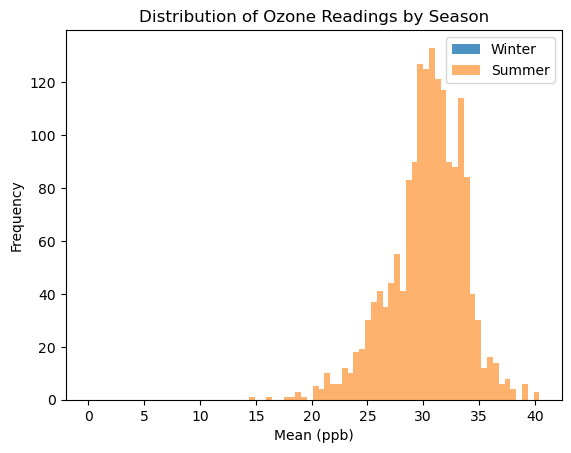

In [9]:
#Ozone (O3) Data Visualization
plt.hist(ozone_winter['Data Value'], bins=50,
         label='Winter', alpha=0.8)

plt.hist(ozone_summer['Data Value'], bins=50,
         label='Summer', alpha=0.6)


plt.title('Distribution of Ozone Readings by Season')
plt.legend(loc='upper right')
plt.xlabel('Mean (ppb)')
plt.ylabel('Frequency')
plt.show()


/Users/Temp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Temp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


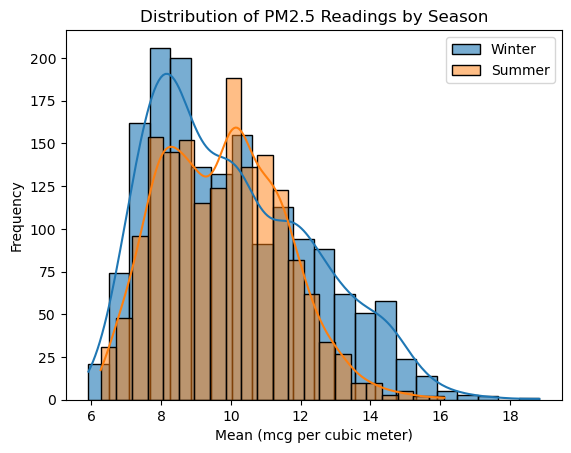

In [11]:
#Fine Particulate Matter (PM2.5) Data Visualization
sns.histplot(pm25_winter['Data Value'], kde=True,
         label='Winter', alpha=0.6)

sns.histplot(pm25_summer['Data Value'], kde=True,
         label='Summer', alpha=0.5)


plt.title('Distribution of PM2.5 Readings by Season')
plt.legend(loc='upper right')
plt.xlabel('Mean (mcg per cubic meter)')
plt.ylabel('Frequency')
plt.show()

/Users/Temp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Temp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


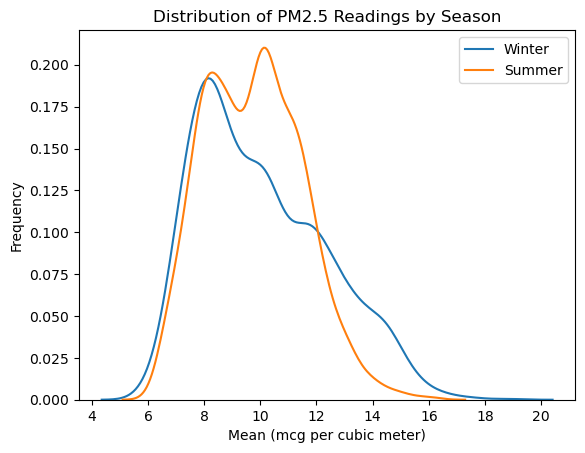

In [12]:
#Fine Particulate Matter (PM2.5); kde - kernel density estimate; plot alone
sns.kdeplot(pm25_winter['Data Value'],
         label='Winter')

sns.kdeplot(pm25_summer['Data Value'],
         label='Summer')


plt.title('Distribution of PM2.5 Readings by Season')
plt.legend(loc='upper right')
plt.xlabel('Mean (mcg per cubic meter)')
plt.ylabel('Frequency')
plt.show()

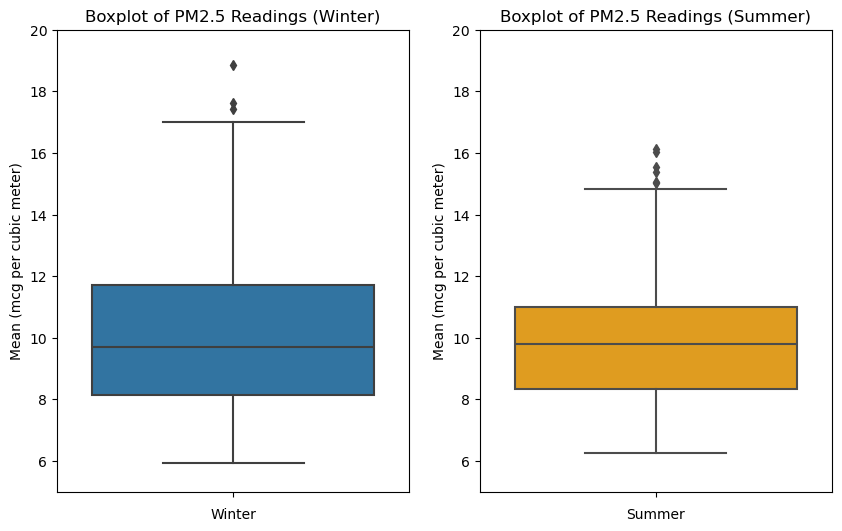

In [13]:
#Fine Particulate Matter (PM2.5); boxplots
#adjusting figure size; allow proper spacing between subplots
plt.rcParams['figure.figsize']=10,6

#creating first subplot
plt.subplot(1,2,1)
sns.boxplot(data=pm25_winter, y='Data Value')
plt.xlabel('Winter')
plt.ylabel('Mean (mcg per cubic meter)')
plt.title('Boxplot of PM2.5 Readings (Winter)')
plt.ylim(5,20) #match between the two plots for better visual comparison

#creating second subplot
plt.subplot(1,2,2)
sns.boxplot(data=pm25_summer, y='Data Value', color='orange')
plt.xlabel('Summer')
plt.ylabel('Mean (mcg per cubic meter)')
plt.title('Boxplot of PM2.5 Readings (Summer)')
plt.ylim(5,20) #match between the two plots for better visual comparison

plt.show()

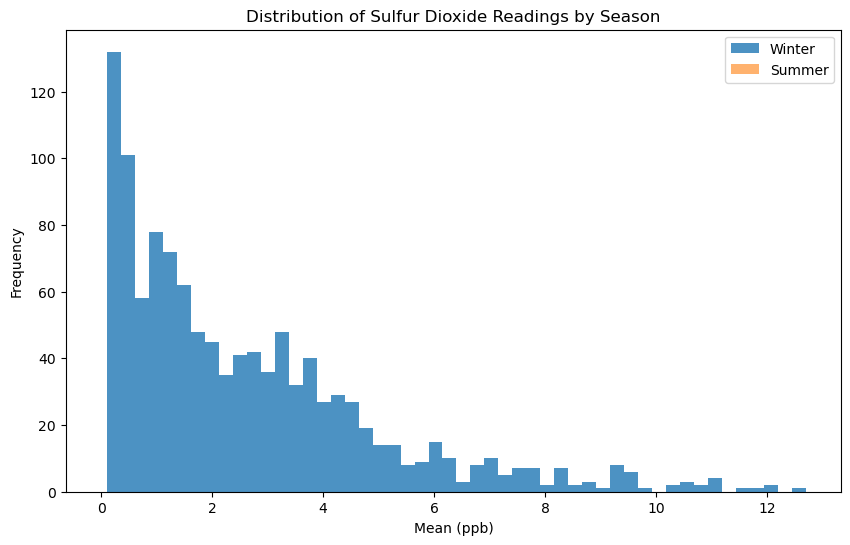

In [14]:
#Sulfur Dioxide (SO2) Data Visualization
plt.hist(sulfurdioxide_winter['Data Value'], bins=50,
         label='Winter', alpha=0.8)

plt.hist(sulfurdioxide_summer['Data Value'], bins=50,
         label='Summer', alpha=0.6)


plt.title('Distribution of Sulfur Dioxide Readings by Season')
plt.legend(loc='upper right')
plt.xlabel('Mean (ppb)')
plt.ylabel('Frequency')
plt.show()

## Statistical Analysis

Note: Only done on PM2.5 because SO2 and O3 only had readings in one season.

Statistical test: two-tailed, two sample t-test

H0: The mean of the mean readings of PM2.5 in winter is equal to that of summer.

Ha: The mean of the mean readings of PM2.5 in winter is not equal to that of summer.

Appropriate?
The sample size of each group is ~1700, giving a total sample size of ~3400. Even if the sample is not normal in shape, because the sample size is so large, a t-test is still appropriate given that sufficiently large sample size (n>=40).

In [15]:
#statistical test: two-sided, two sample t-test

#two-sided, 2 sample t test (pooled)
t_stat, p_value = stats.ttest_ind(a=pm25_winter['Data Value'],
                                  b=pm25_summer['Data Value'],
                                  alternative='two-sided', equal_var=True)
print(f'Pooled t-test \nt statistic: {t_stat}; p-value: {p_value}')
print() #for visual space

#two-sided, 2 sample t test (non-pooled)
t_stat, p_value = stats.ttest_ind(a=pm25_winter['Data Value'],
                                  b=pm25_summer['Data Value'],
                                  alternative='two-sided', equal_var=False)
print(f'Non-pooled t-test \nt statistic: {t_stat}; p-value: {p_value}')

Pooled t-test 
t statistic: 4.102018556139173; p-value: 4.1921295444888905e-05

Non-pooled t-test 
t statistic: 4.102018556139173; p-value: 4.1998554068738434e-05
